In [17]:
import pandas as pd 
import sklearn
import preprocessor.api as p
from preprocessor import clean, parse, tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import collections, numpy
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from gensim.models import Word2Vec

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df= pd.read_csv(r'normal_tweets_v2.csv', usecols=['tweet'])

In [7]:
uncleaned_list = df['tweet'].tolist()
cleaned_list = []
for x in uncleaned_list:
    cleaned_list.append(p.clean(x))

In [25]:
df['cleaned'] = pd.DataFrame({'cleaned':cleaned_list})


In [31]:
print('Pre-processing tweet text...')  
corpus = df['cleaned']  
vectorizer = TfidfVectorizer(decode_error='replace', strip_accents='unicode',  
                             stop_words='english', tokenizer=tokenize)
X = vectorizer.fit_transform(corpus.values)  

print(X.shape)


print('Fitting Truncated SVD transform...')  # pca doesnt work because sparse
tsvd = TruncatedSVD(n_components=2)  
X_tsvd=tsvd.fit_transform(X)

print(X_tsvd.shape)


X_train, X_test = train_test_split(X_tsvd, test_size=0.3, random_state = 42)
principal_df_train = pd.DataFrame(data = X_train, columns=['PC1', 'PC2'])


print('Training sentiment classification model...')  
kmeans = KMeans(n_clusters=2)  
kmeans.fit(X_train)

X_clustered_train = pd.DataFrame(kmeans.fit_predict(principal_df_train), columns=['CLUSTER'], index=principal_df_train.index)

Pre-processing tweet text...


/Users/arabellapeake/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(28876, 379)
Fitting Truncated SVD transform...
(28876, 2)
Training sentiment classification model...


Text(0, 0.5, 'Princiapl Component 2')

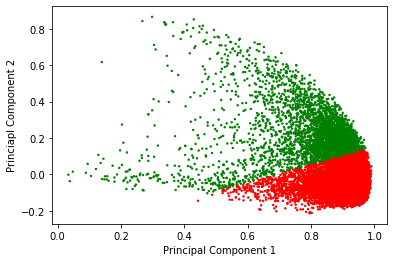

In [32]:
# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered_train['CLUSTER']]
    
    
# Plot the scatter digram in 3D
plt.scatter(principal_df_train['PC1'],principal_df_train['PC2'], c= label_color, s=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Princiapl Component 2')



0    6909
1    1754
Name: Label, dtype: int64


Text(0.5, 0, 'Cluster Label')

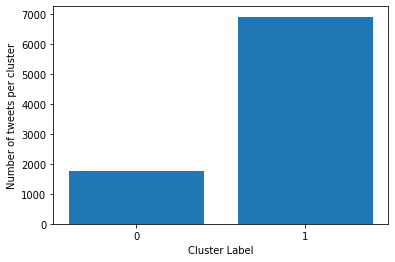

In [33]:
# now, what is testing data labelled as 
y_pred=kmeans.predict(X_test)


df_test_predictions=pd.DataFrame(columns=['Label'])
df_test_predictions['Label']=y_pred

print(df_test_predictions['Label'].value_counts())

a=numpy.array(y_pred)
plt.bar(['0', '1'], [numpy.count_nonzero(a == 1),numpy.count_nonzero(a == 0) ])
plt.ylabel('Number of tweets per cluster')
plt.xlabel('Cluster Label')